Exploration of 2024 Q4 data to find the necessary pre-processing steps and build a standardization pipeline

In [1]:
# imports
import pandas as pd
import os
import numpy as np
from IPython.display import display

In [93]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
current_path = os.getcwd()
print(fr'{current_path}')

C:\Users\utsav\Desktop\research\research


In [4]:
# filename initials
demography = "DEMO"
outcome = "OUTC"
reaction = "REAC"
indication = "INDI"
report_src = "RPSR"
therapy ='THER'
drug = 'DRUG'


In [5]:
# directory path for data
data_q24 = r'data\\faers_ascii_2024Q4'
directory_path = os.path.join(current_path, data_q24)
# list of second-generation antihistamines
antihistamines = ["Fexofenadine", "Cetirizine", "Loratadine", "Levocetirizine"]

In [6]:
# method to read file
def read_faers_file(file_name, delimiter="$"):
  file_path = os.path.join(directory_path, file_name)
  df = pd.read_csv(file_path, sep=delimiter, dtype=str)
  df['caseid'] = pd.to_numeric(df['caseid'], errors='coerce')
  return df


In [7]:
#method to explore null values
def explore_missing_vals(df, file_name):
  print(f'Missing values for {file_name}: ')
  print(df.isnull().sum())


In [8]:
# searching in the drug dataset where antihistamines are the primary suspect
def filter_antihistamines(drug_df):
  return drug_df[(drug_df["drugname"].str.contains('|'.join(antihistamines), case=False, na=False))
                 & (drug_df["role_cod"] == "PS")]

In [9]:
# method to provide dataset summary
def dataset_summary(df, column, top_n=10):
    print(f"\nTop {top_n} {column} in dataset:")
    print(df[column].value_counts().head(top_n))

In [10]:
# method to merge the various files within the downloaded folder
def merge_faers_data(filtered_drug_df, reac_df, demo_df, outc_df,rpsr_df):
    merged_df = (
        filtered_drug_df
        .merge(reac_df, on="caseid", how="left",suffixes=('', '_reac'))
        .merge(demo_df, on="caseid", how="left", suffixes=('', '_demo'))
        .merge(outc_df, on="caseid", how="left", suffixes=('', '_outc'))
        .merge(rpsr_df, on="caseid", how="left",suffixes=('', '_rpsr'))
    )
    return merged_df

In [11]:
def count_reactions_by_source(merged_df):
    source_counts = merged_df.groupby("rpsr_cod")["caseid"].count().reset_index()
    source_counts.columns = ["report_source", "reaction_count"]
    return source_counts

In [12]:
#processing the data
def process_faers_dataset():
    drug_df = read_faers_file(f'{drug}24Q4.txt')
    reac_df = read_faers_file(f"{reaction}24Q4.txt")
    demo_df = read_faers_file(f"{demography}24Q4.txt")
    outc_df = read_faers_file(f"{outcome}24Q4.txt")
    rpsr_df = read_faers_file(f"{report_src}24Q4.txt")

    filtered_drugs = filter_antihistamines(drug_df)
    final_df = merge_faers_data(filtered_drugs, reac_df, demo_df, outc_df, rpsr_df)
  # print(final_df.columns)
  # print(final_df["RPSR_COD".lower()].unique())
  # reaction_counts = count_reactions_by_source(final_df)
  # print(reaction_counts)
    return final_df

In [13]:
data_f = process_faers_dataset()



In [14]:
data_f.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq', 'primaryid_reac', 'pt',
       'drug_rec_act', 'primaryid_demo', 'caseversion', 'i_f_code', 'event_dt',
       'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num', 'mfr_num',
       'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex', 'e_sub',
       'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod', 'reporter_country',
       'occr_country', 'primaryid_outc', 'outc_cod', 'primaryid_rpsr',
       'rpsr_cod'],
      dtype='object')

In [15]:
data_f[["rept_dt","event_dt"]].head(5)

,rept_dt,event_dt
0,20241004,20110101
1,20241004,20110101
2,20241004,20110101
3,20241004,20110101
4,20241004,20110101


In [16]:
data_f[data_f['drugname']=='CETIRIZINE'].head(10)

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,pt,drug_rec_act,primaryid_demo,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,outc_cod,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Suicide attempt,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,OT,NaN,NaN
1,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Suicide attempt,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,HO,NaN,NaN
2,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Suicide attempt,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,LT,NaN,NaN
3,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Hepatic necrosis,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,OT,NaN,NaN
4,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Hepatic necrosis,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,HO,NaN,NaN
5,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Hepatic necrosis,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,LT,NaN,NaN
6,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Off label use,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,OT,NaN,NaN
7,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Off label use,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,HO,NaN,NaN
8,1454484512,14544845,3,PS,CETIRIZINE,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,NaN,NaN,D,NaN,NaN,NaN,090750,NaN,NaN,Film-coated tablet,NaN,1454484512,Off label use,NaN,1454484512,12,F,20110101,20240923,20180217,20241004,EXP,NaN,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,NaN,F,Y,NaN,NaN,20241004,NaN,MD,FR,FR,1454484512,LT,NaN,NaN
9,1454484512,14544845,3,PS,CETIRIZIN

In [17]:
data_f[data_f['drugname']=='CETIRIZINE'][['primaryid','caseid','drugname','pt','event_dt','outc_cod']].head(5)

,primaryid,caseid,drugname,pt,event_dt,outc_cod
0,1454484512,14544845,CETIRIZINE,Suicide attempt,20110101,OT
1,1454484512,14544845,CETIRIZINE,Suicide attempt,20110101,HO
2,1454484512,14544845,CETIRIZINE,Suicide attempt,20110101,LT
3,1454484512,14544845,CETIRIZINE,Hepatic necrosis,20110101,OT
4,1454484512,14544845,CETIRIZINE,Hepatic necrosis,20110101,HO


In [18]:
# merging based on primaryid, caseid, drugname, event_dt and pt since multiple rows being generated for different outc_cod column
group_cols = ['primaryid', 'caseid', 'drugname', 'event_dt', 'pt']

merged_df = data_f.groupby(group_cols, as_index=False).agg({
    'outc_cod': lambda x: ','.join(x.dropna().astype(str)),  # Merge outcome codes
    **{col: lambda x: ','.join(x.astype(str).unique()) for col in data_f.columns if col not in group_cols + ['outc_cod']}
})


In [19]:
import subprocess

In [20]:
# to copy downloaded files and clear them from the directory once processing is finished
import glob
import shutil
current_dir = os.path.join(os.getcwd(),'pre-\\')
print(current_dir)
os.listdir(current_dir)
req_folder = ["ASCII",'ascii']
for folder in os.listdir(current_dir):
    path_to_work = os.path.join(current_dir, folder)
    i = folder
    # loc1 = f'"C:\\Users\\utsav\\Desktop\\personal\\research\\pre-\\{folder}\\ASCII\\*.txt"'
    # print(loc1)
    cmd = f'xcopy "C:\\Users\\utsav\\Desktop\\personal\\research\\pre-\\{folder}\\ascii\\*.txt" "C:\\Users\\utsav\\Desktop\\personal\\research\\pre-\\{folder}"'
    cmd2 = f'C:/Users/utsav/Desktop/personal/research/pre-/{folder}/ascii'
    cmd3 = fr'C:/Users/utsav/Desktop/personal/research/pre-/{folder}/deleted'
    folder_path = f"C:/Users/utsav/Desktop/personal/research/pre-/{folder}"
    for file in glob.glob(f"{folder_path}/*.pdf"):
        os.remove(file)
    for i in os.listdir(path_to_work):
        if i in req_folder:
            subprocess.run(cmd)
            # subprocess.run(cmd2)
            # subprocess.run(cmd3)
            shutil.rmtree(cmd2) 
            shutil.rmtree(cmd3)
    

            

C:\Users\utsav\Desktop\research\research\pre-\


In [21]:
merged_df.head(5)

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,Drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,Drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,Hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,Intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,Off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan


### EDA

#### check for missing data in various columns

In [22]:
dataset_summary(merged_df,'age')


Top 10 age in dataset:
age
nan    219
64      52
57      16
75      15
21      13
20      12
31      11
27       8
42       8
25       8
Name: count, dtype: int64


In [23]:
merged_df[['age','age_cod']].value_counts()

age  age_cod
nan  nan        219
64   YR          52
57   YR          16
75   YR          15
20   YR          12
               ... 
44   YR           1
51   YR           1
91   YR           1
92   YR           1
48   YR           1
Name: count, Length: 63, dtype: int64

In [24]:
merged_df['age_cod'].unique()

array(['YR', 'nan', 'MON', 'DEC'], dtype=object)

In [25]:
def convert_nan_to_npnan(df, column_name):
    df = df.copy()
    df[column_name] = df[column_name].replace(['nan', 'NaN', 'None'], np.nan)
    return df

In [26]:
convert_nan_to_npnan(merged_df,'age')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,Drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,Drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,Hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,Intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,Off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,Skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,nan,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan
531,247906781,24790678,CETIRIZINE,20240705,Cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,Lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,nan,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,NaN,nan,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan
533,247953721,24795372,CETIRIZINE,20241126,Lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"1 dosage form, qd",nan,nan,N,nan,nan,nan,076677,nan,nan,Unknown,QD,247953721,nan,247953721,1,I,20241224,20241231,20241231,

In [34]:
merged_df[['age','age_cod']].value_counts()

age  age_cod
64   YR         52
57   YR         16
75   YR         15
20   YR         12
21   YR         11
                ..
28   YR          1
18   YR          1
11   YR          1
7    YR          1
92   YR          1
Name: count, Length: 62, dtype: int64

In [36]:
unique_combinations_counts = merged_df.groupby(['age_cod']).size().reset_index(name='count')
print(unique_combinations_counts)

  age_cod  count
0     DEC      5
1     MON      7
2      YR    304
3     nan    219


In [28]:
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

In [29]:
merged_df[['age']].value_counts()

age 
64.0    52
57.0    16
75.0    15
21.0    13
20.0    12
31.0    11
42.0     8
86.0     8
32.0     8
27.0     8
25.0     8
53.0     8
72.0     7
50.0     7
22.0     7
54.0     7
15.0     7
81.0     6
5.0      6
3.0      6
12.0     6
14.0     5
47.0     5
4.0      5
55.0     4
33.0     4
89.0     4
52.0     3
66.0     3
28.0     3
78.0     3
29.0     3
23.0     3
82.0     3
17.0     3
13.0     3
68.0     2
79.0     2
65.0     2
62.0     2
1.0      2
46.0     2
58.0     2
2.0      2
19.0     2
37.0     2
43.0     2
41.0     2
44.0     1
67.0     1
76.0     1
56.0     1
48.0     1
80.0     1
51.0     1
18.0     1
11.0     1
7.0      1
91.0     1
92.0     1
Name: count, dtype: int64

In [30]:
def type_conversion(df, column_name,tp):
    df[column_name] = df[column_name].astype(tp)

In [31]:
type_conversion(merged_df,'age','Int64')

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

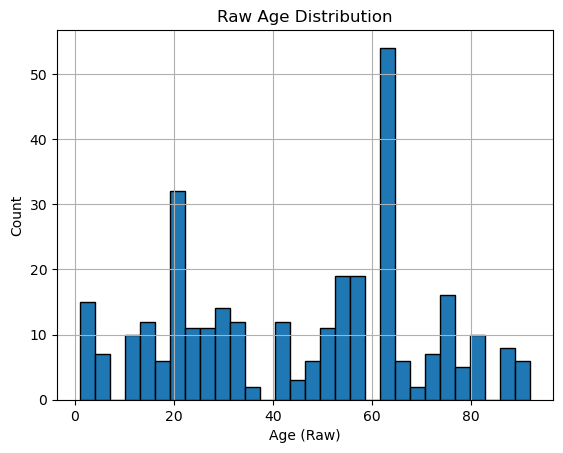

In [42]:
# before conversion (from AGE column)
merged_df['age'].hist(bins=30, edgecolor='black')
plt.title("Raw Age Distribution")
plt.xlabel("Age (Raw)")
plt.ylabel("Count")
plt.savefig("age_raw_distribution.png", dpi=300, bbox_inches='tight')
# plt.clf()
plt.show()

array([[<Axes: title={'center': 'age'}>]], dtype=object)

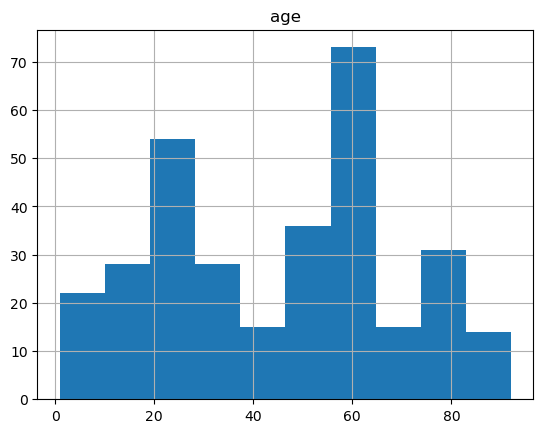

In [43]:
merged_df.hist(column='age')

In [44]:
print("Missing age values:", merged_df['age'].isna().sum())

Missing age values: 219


In [45]:
# converting nan for age_cod to np.nan

In [46]:
convert_nan_to_npnan(merged_df,'age_cod')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,Drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,Drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,Hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,Intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,Off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,Skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,nan,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan
531,247906781,24790678,CETIRIZINE,20240705,Cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,Lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,nan,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,<NA>,NaN,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan
533,247953721,24795372,CETIRIZINE,20241126,Lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"1 dosage form, qd",nan,nan,N,nan,nan,nan,076677,nan,nan,Unknown,QD,247953721,nan,247953721,1,I,20241224,20241231,20241231

In [47]:
print("Missing age values:", merged_df['age_cod'].isna().sum())

Missing age values: 0


In [48]:
# standardizing the age values
def convert_age_to_years(df):
    df = df.copy()  
    
    df['age'] = df['age'].astype(float)

    # Convert into years
    df.loc[df['age_cod'] == 'MON', 'age'] /= 12        # months 
    df.loc[df['age_cod'] == 'WK', 'age'] /= 52.1429    # weeks
    df.loc[df['age_cod'] == 'DY', 'age'] /= 365        # days
    df.loc[df['age_cod'] == 'HR', 'age'] /= 8760       # hours
    df.loc[df['age_cod'] == 'DEC', 'age'] *= 10        # decades

    return df



In [49]:
age_converted_df = convert_age_to_years(merged_df)

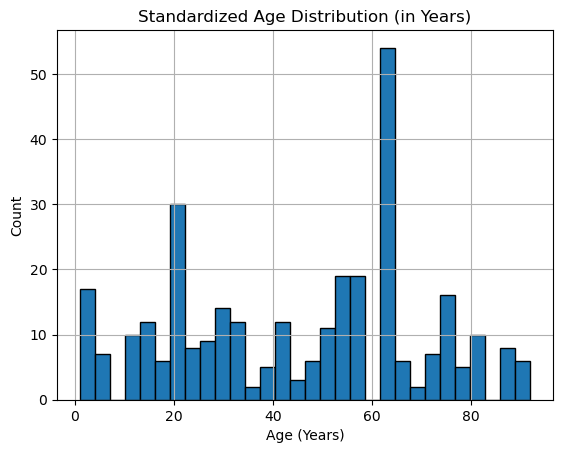

In [51]:
age_converted_df['age'].hist(bins=30, edgecolor='black')
plt.title("Standardized Age Distribution (in Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.savefig("age_standardized_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

array([[<Axes: title={'center': 'age'}>]], dtype=object)

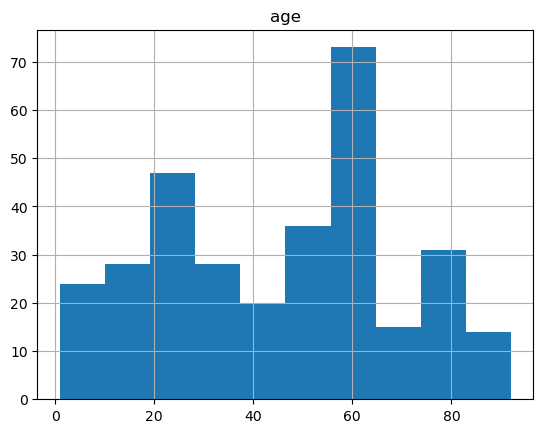

In [52]:
age_converted_df.hist(column='age')

In [53]:
print("Min age:", age_converted_df['age'].min())
print("Max age:", age_converted_df['age'].max())


Min age: 1.0
Max age: 92.0


In [54]:
print("Missing ages after conversion:", age_converted_df['age'].isna().sum())


Missing ages after conversion: 219


In [55]:
print(age_converted_df[age_converted_df['age'] < 1]['age'].value_counts().head(10))


Series([], Name: count, dtype: int64)


finding ways to handle the missing value in the age column

In [56]:
drug_summary = age_converted_df.groupby('drugname')['age'].describe().round(2)
reaction_summary = age_converted_df.groupby('pt')['age'].describe().round(2)

# example drug 
drug_example = drug_summary.loc['CETIRIZINE']
reaction_example = reaction_summary.loc['Insomnia']

# comparison table

comparison_table = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Std', 'Min', '25%', '50% (Median)', '75%', 'Max'],
    'CETIRIZINE (Drug)': drug_example,
    'Insomnia (Reaction)': reaction_example
}).reset_index(drop=True)

comparison_table

# display(name="Drug vs Reaction Age Summary", dataframe=comparison_table)

,Metric,CETIRIZINE (Drug),Insomnia (Reaction)
0,Count,102.00,8.00
1,Mean,42.04,57.00
2,Std,21.79,14.97
3,Min,5.00,22.00
4,25%,20.00,60.50
5,50% (Median),42.00,64.00
6,75%,64.00,64.00
7,Max,81.00,64.00


exploring and pre-processing other columns to find the best column on whose basis imputation in age will be done

In [58]:
print("Unique drug names:", age_converted_df['drugname'].nunique())
print("Unique reaction terms (PT):", age_converted_df['pt'].nunique())

# Top 10 most common drugs
print(age_converted_df['drugname'].value_counts().head(10))

# Top 10 most common reactions
print(age_converted_df['pt'].value_counts().head(10))

Unique drug names: 12
Unique reaction terms (PT): 242
drugname
CETIRIZINE                                                187
CETIRIZINE HYDROCHLORIDE                                  133
LORATADINE                                                 63
FEXOFENADINE                                               40
DESLORATADINE                                              37
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY                 37
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE     13
LEVOCETIRIZINE DIHYDROCHLORIDE                              9
FEXOFENADINE HYDROCHLORIDE                                  7
LORATADINE\PSEUDOEPHEDRINE SULFATE                          5
Name: count, dtype: int64
pt
Off label use           14
Anxiety                 13
Insomnia                13
Drug ineffective        11
Malaise                 11
Hypersensitivity         9
Abdominal discomfort     9
Rash                     9
Pain of skin             9
Somnolence               9
Name: count, dtype

In [59]:
age_converted_df['drugname'] = age_converted_df['drugname'].str.upper().str.strip()

In [60]:
age_converted_df['pt'] = age_converted_df['pt'].str.lower().str.strip()


In [61]:
print("Missing age values per drug:")
print(age_converted_df[age_converted_df['age'].isna()]['drugname'].value_counts().head(10))

print("Missing age values per reaction:")
print(age_converted_df[age_converted_df['age'].isna()]['pt'].value_counts().head(10))

Missing age values per drug:
drugname
CETIRIZINE HYDROCHLORIDE                      87
CETIRIZINE                                    85
LORATADINE                                    20
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY    19
DESLORATADINE                                  3
LORATADINE\PSEUDOEPHEDRINE SULFATE             2
LORATADINE AND PSEUDOEPHEDRINE SULFATE         2
FEXOFENADINE HYDROCHLORIDE                     1
Name: count, dtype: int64
Missing age values per reaction:
pt
off label use                           9
drug ineffective                        6
anxiety                                 5
insomnia                                5
dyspnoea                                4
pyrexia                                 3
hypersensitivity                        3
malaise                                 3
product use in unapproved indication    3
pain of skin                            3
Name: count, dtype: int64


summaries based on reaction and drugs

In [63]:
drug_age_summary = age_converted_df.groupby('drugname')['age'].describe().sort_values(by='count', ascending=False).head(10)
print(drug_age_summary)

                                                    count       mean  \
drugname                                                               
CETIRIZINE                                          102.0  42.039216   
CETIRIZINE HYDROCHLORIDE                             46.0  53.125000   
LORATADINE                                           43.0  51.178295   
FEXOFENADINE                                         40.0  50.075000   
DESLORATADINE                                        34.0  50.147059   
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY           18.0  13.083333   
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROC...   13.0  35.230769   
LEVOCETIRIZINE DIHYDROCHLORIDE                        9.0  45.444444   
FEXOFENADINE HYDROCHLORIDE                            6.0  55.833333   
LORATADINE\PSEUDOEPHEDRINE SULFATE                    3.0  52.000000   

                                                          std        min  \
drugname                                                   

In [64]:
# summary statistics for Age grouped by PT (Reaction)
reaction_age_summary = age_converted_df.groupby('pt')['age'].describe().sort_values(by='count', ascending=False).head(10)
print(reaction_age_summary)


                             count       mean        std        min    25%  \
pt                                                                           
incorrect dose administered    9.0  26.435185  28.098715   1.916667   3.00   
insomnia                       8.0  57.000000  14.966630  22.000000  60.50   
anxiety                        8.0  57.375000  13.968715  25.000000  60.50   
malaise                        8.0  53.625000  19.360767  18.000000  54.75   
somnolence                     7.0  26.142857  12.979838  20.000000  20.00   
rash                           7.0  12.857143  19.886583   1.000000   4.00   
skin irritation                6.0  64.000000   0.000000  64.000000  64.00   
pruritus                       6.0  65.833333  13.347909  56.000000  57.00   
drug withdrawal syndrome       6.0  64.000000   0.000000  64.000000  64.00   
pain of skin                   6.0  64.000000   0.000000  64.000000  64.00   

                              50%   75%   max  
pt             

In [65]:
# patterns between drug and age rather than reaction and age

In [66]:
age_before = age_converted_df['age'].dropna()

In [67]:
# age imputation by drugname
median_age_by_drug = age_converted_df.groupby('drugname')['age'].median()
age_converted_df['age'] = age_converted_df.apply(lambda row: median_age_by_drug[row['drugname']] if pd.isna(row['age']) else row['age'], axis=1)


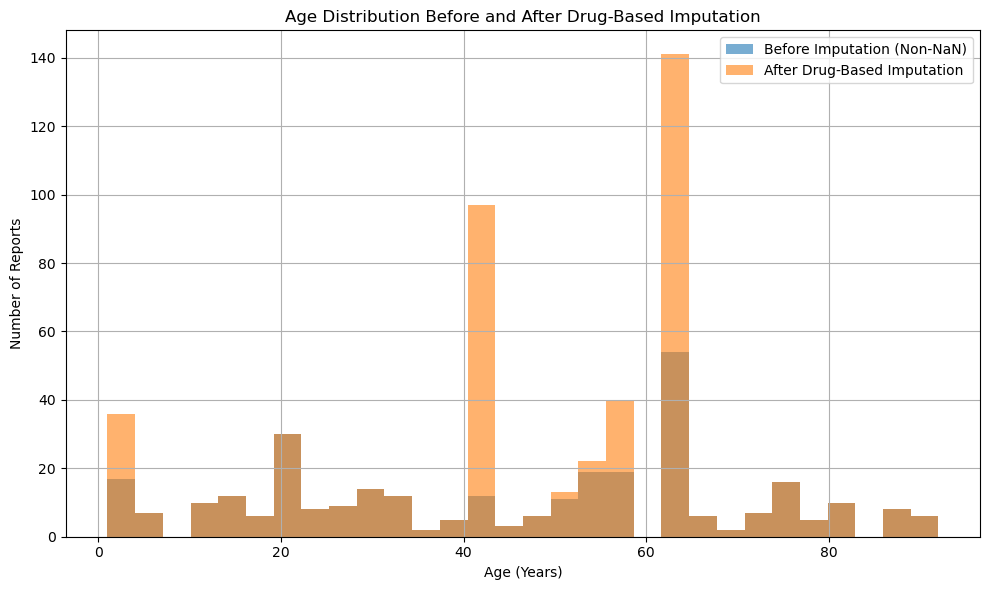

In [72]:
age_after = age_converted_df['age']

# 4. Plot before and after distributions
plt.figure(figsize=(10,6))
plt.hist(age_before, bins=30, alpha=0.6, label='Before Imputation (Non-NaN)')
plt.hist(age_after, bins=30, alpha=0.6, label='After Drug-Based Imputation')
plt.title('Age Distribution Before and After Drug-Based Imputation')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Reports')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("age_distribution_before_after_imputation.png", dpi=300)
plt.show()

In [68]:
age_converted_df[age_converted_df['age'].isna()].value_counts()

Series([], Name: count, dtype: int64)

In [69]:
convert_nan_to_npnan(age_converted_df,'event_dt')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,nan,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14.0,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan
531,247906781,24790678,CETIRIZINE,20240705,cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81.0,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,nan,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan
533,247953721,24795372,CETIRIZINE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"1 dosage form, qd",nan,nan,N,nan,nan,nan,076677,nan,nan,Unknown,QD,247953721,nan,247953721,1,I,20241224,202

In [70]:
convert_nan_to_npnan(age_converted_df,'pt')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,nan,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14.0,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan
531,247906781,24790678,CETIRIZINE,20240705,cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81.0,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,nan,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan
533,247953721,24795372,CETIRIZINE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"1 dosage form, qd",nan,nan,N,nan,nan,nan,076677,nan,nan,Unknown,QD,247953721,nan,247953721,1,I,20241224,202

In [71]:
convert_nan_to_npnan(age_converted_df,'sex')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
0,1454484512,14544845,CETIRIZINE,20110101,drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
1,1454484512,14544845,CETIRIZINE,20110101,drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
2,1454484512,14544845,CETIRIZINE,20110101,hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
3,1454484512,14544845,CETIRIZINE,20110101,intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
4,1454484512,14544845,CETIRIZINE,20110101,off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,nan,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,nan,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14.0,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan
531,247906781,24790678,CETIRIZINE,20240705,cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81.0,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,nan,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,64.0,nan,nan,NaN,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan
533,247953721,24795372,CETIRIZINE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"1 dosage form, qd",nan,nan,N,nan,nan,nan,076677,nan,nan,Unknown,QD,247953721,nan,247953721,1,I,20241224,202

In [73]:
age_converted_df['sex'].isna().sum()

0

In [74]:
age_converted_df[age_converted_df['sex'].isna()]

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod


In [75]:
age_converted_df.columns

Index(['primaryid', 'caseid', 'drugname', 'event_dt', 'pt', 'outc_cod',
       'drug_seq', 'role_cod', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'primaryid_reac', 'drug_rec_act', 'primaryid_demo', 'caseversion',
       'i_f_code', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num',
       'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex',
       'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod',
       'reporter_country', 'occr_country', 'primaryid_outc', 'primaryid_rpsr',
       'rpsr_cod'],
      dtype='object')

In [76]:
age_converted_df.shape[0]

535

exploring the missing values in the age column

In [78]:
print("Total missing values in SEX:", age_converted_df['sex'].isna().sum())
print("SEX distribution in non-missing cases:")
print(age_converted_df['sex'].value_counts(normalize=True))


Total missing values in SEX: 0
SEX distribution in non-missing cases:
sex
F      0.403738
M      0.310280
nan    0.285981
Name: proportion, dtype: float64


In [79]:
print('drugs with most missing sex values')
print(age_converted_df[age_converted_df['sex'].isna()]['drugname'].value_counts().head(10))

drugs with most missing sex values
Series([], Name: count, dtype: int64)


In [80]:
print('reactions with most missing sex values')
print(age_converted_df[age_converted_df['sex'].isna()]['pt'].value_counts().head(10))

reactions with most missing sex values
Series([], Name: count, dtype: int64)


In [81]:
age_converted_df[age_converted_df['sex']=='nan'].head(5)

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod
13,199237056,19923705,CETIRIZINE HYDROCHLORIDE,20180829,alopecia,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,"1 dosage form, as needed",nan,nan,U,nan,nan,nan,019835,nan,nan,Unknown,nan,199237056,nan,199237056,6,F,20241119,20211006,20241128,EXP,nan,DE-JNJFOC-20190707481,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241128,nan,CN,DE,DE,199237056,nan,nan
14,199237056,19923705,CETIRIZINE HYDROCHLORIDE,20180829,blood pressure increased,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,"1 dosage form, as needed",nan,nan,U,nan,nan,nan,019835,nan,nan,Unknown,nan,199237056,nan,199237056,6,F,20241119,20211006,20241128,EXP,nan,DE-JNJFOC-20190707481,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241128,nan,CN,DE,DE,199237056,nan,nan
15,199237056,19923705,CETIRIZINE HYDROCHLORIDE,20180829,body temperature increased,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,"1 dosage form, as needed",nan,nan,U,nan,nan,nan,019835,nan,nan,Unknown,nan,199237056,nan,199237056,6,F,20241119,20211006,20241128,EXP,nan,DE-JNJFOC-20190707481,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241128,nan,CN,DE,DE,199237056,nan,nan
16,199237056,19923705,CETIRIZINE HYDROCHLORIDE,20180829,bronchitis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,"1 dosage form, as needed",nan,nan,U,nan,nan,nan,019835,nan,nan,Unknown,nan,199237056,nan,199237056,6,F,20241119,20211006,20241128,EXP,nan,DE-JNJFOC-20190707481,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241128,nan,CN,DE,DE,199237056,nan,nan
17,199237056,19923705,CETIRIZINE HYDROCHLORIDE,20180829,covid-19,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,"1 dosage form, as needed",nan,nan,U,nan,nan,nan,019835,nan,nan,Unknown,nan,199237056,nan,199237056,6,F,20241119,20211006,20241128,EXP,nan,DE-JNJFOC-20190707481,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241128,nan,CN,DE,DE,199237056,nan,nan


In [82]:
df_with_sex = age_converted_df[age_converted_df['sex']!='nan']  # missing SEX removedd
df_with_unknown = age_converted_df.copy()
df_with_unknown['sex'].fillna("Unknown", inplace=True)

# comparing outcome rates
print("Outcome distribution without missing SEX:")
print(df_with_sex['outc_cod'].value_counts(normalize=True))

print("Outcome distribution with 'Unknown' SEX:")
print(df_with_unknown['outc_cod'].value_counts(normalize=True))


Outcome distribution without missing SEX:
outc_cod
OT                         0.376963
                           0.227749
DS,OT                      0.094241
HO                         0.086387
OT,DS                      0.041885
LT                         0.036649
HO,OT                      0.034031
LT,OT                      0.018325
OT,HO,LT                   0.015707
LT,OT,HO,DS                0.013089
HO,LT,OT                   0.013089
CA                         0.010471
HO,OT,HO,OT                0.007853
OT,HO                      0.007853
RI,OT                      0.007853
DS                         0.005236
LT,OT,HO,DS,LT,OT,HO,DS    0.002618
Name: proportion, dtype: float64
Outcome distribution with 'Unknown' SEX:
outc_cod
OT                         0.459813
                           0.177570
HO                         0.084112
DS,OT                      0.082243
OT,DS                      0.046729
HO,OT                      0.037383
LT                         0.026168
LT

C:\Users\utsav\AppData\Local\Temp\ipykernel_30644\3861979457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_unknown['sex'].fillna("Unknown", inplace=True)


In [83]:
# sensitivity analysis shows the value of outc_cod changes when "unknown" sex is introduced

In [85]:
age_converted_df['sex'] = age_converted_df['sex'].replace('nan', np.nan)

In [86]:
age_converted_df['sex'].isna().sum()

153

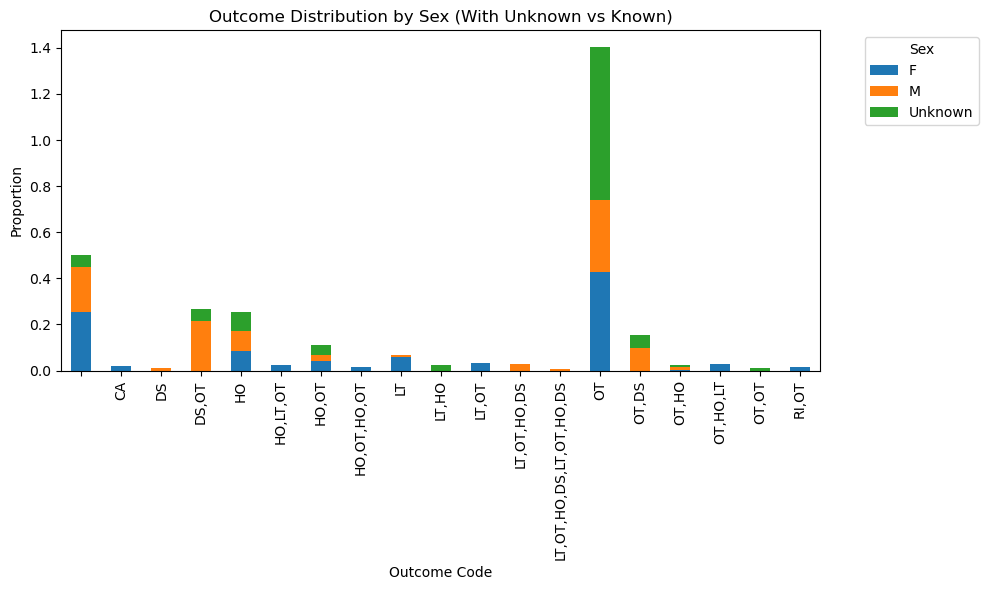

In [87]:
age_converted_df['sex_cleaned'] = age_converted_df['sex'].fillna('Unknown')

# group by sex and OUTC_COD
outcome_dist = age_converted_df.groupby(['sex_cleaned', 'outc_cod']).size().unstack(fill_value=0)

outcome_prop = outcome_dist.divide(outcome_dist.sum(axis=1), axis=0)

# plot
outcome_prop.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Outcome Distribution by Sex (With Unknown vs Known)")
plt.xlabel("Outcome Code")
plt.ylabel("Proportion")
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("outcome_by_sex_sensitivity.png", dpi=300)
plt.show()

In [67]:
age_converted_df['sex'].fillna("Unknown", inplace=True)


C:\Users\utsav\AppData\Local\Temp\ipykernel_30292\2949259767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  age_converted_df['sex'].fillna("Unknown", inplace=True)


In [68]:
age_converted_df['sex'].isna().sum()


0

In [69]:
age_converted_df['pt'].isna().sum()

0

listing the various drugs

In [71]:
age_converted_df['drugname'].unique()

array(['CETIRIZINE', 'CETIRIZINE HYDROCHLORIDE', 'DESLORATADINE',
       'LORATADINE', 'FEXOFENADINE HYDROCHLORIDE',
       'CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY',
       'LEVOCETIRIZINE DIHYDROCHLORIDE',
       'LORATADINE\\PSEUDOEPHEDRINE SULFATE',
       'LORATADINE AND PSEUDOEPHEDRINE SULFATE', 'FEXOFENADINE',
       'LEVOCETIRIZINE',
       'CETIRIZINE HYDROCHLORIDE\\PSEUDOEPHEDRINE HYDROCHLORIDE'],
      dtype=object)

listing unique reaction terms

In [72]:
age_converted_df['pt'].unique()

array(['drug abuse', 'drug-induced liver injury', 'hepatic necrosis',
       'intentional overdose', 'off label use', 'suicide attempt',
       'condition aggravated', 'epidermolysis bullosa', 'leukopenia',
       'lymphopenia', 'product use in unapproved indication',
       'toxic epidermal necrolysis', 'alopecia',
       'blood pressure increased', 'body temperature increased',
       'bronchitis', 'covid-19', 'cough', 'dyspnoea', 'ear pain',
       'fatigue', 'gastrointestinal infection', 'hot flush',
       'hypoaesthesia', 'infection susceptibility increased',
       'nasal congestion', 'nasopharyngitis', 'palpitations',
       'paraesthesia', 'pustule', 'pyrexia', 'intentional product misuse',
       'intentional product use issue', 'subarachnoid haemorrhage',
       'congenital genital malformation female',
       'foetal exposure during pregnancy', 'abdominal discomfort',
       'abdominal pain upper', 'adverse drug reaction', 'amnesia',
       'angioedema', 'anosmia', 'anxiety

In [73]:
age_converted_df.shape[0]

535

In [74]:
age_converted_df.columns

Index(['primaryid', 'caseid', 'drugname', 'event_dt', 'pt', 'outc_cod',
       'drug_seq', 'role_cod', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'primaryid_reac', 'drug_rec_act', 'primaryid_demo', 'caseversion',
       'i_f_code', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num',
       'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex',
       'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod',
       'reporter_country', 'occr_country', 'primaryid_outc', 'primaryid_rpsr',
       'rpsr_cod'],
      dtype='object')

In [75]:
import requests

def normalize_drug_names(df, column='drugname'):
    """
    testing with  RxNorm API to Normalize the drug names.

    """
    base_url = 'https://rxnav.nlm.nih.gov/REST/rxcui.json?name='

    def get_rxnorm_name(drug_name):
        try:
            response = requests.get(base_url + drug_name)
            response.raise_for_status()
            data = response.json()
            if 'idGroup' in data and 'name' in data['idGroup']:
                return data['idGroup']['name']
            else:
                return drug_name
        except requests.RequestException as e:
            print(f"Error fetching RxNorm name for {drug_name}: {e}")
            return drug_name

    # RxNorm mapping to each drug name
    df['normalized_drugname'] = df[column].apply(get_rxnorm_name)
    return df


In [76]:
normalized_df = normalize_drug_names(age_converted_df)

In [77]:
normalized_df.columns

Index(['primaryid', 'caseid', 'drugname', 'event_dt', 'pt', 'outc_cod',
       'drug_seq', 'role_cod', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'primaryid_reac', 'drug_rec_act', 'primaryid_demo', 'caseversion',
       'i_f_code', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num',
       'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex',
       'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod',
       'reporter_country', 'occr_country', 'primaryid_outc', 'primaryid_rpsr',
       'rpsr_cod', 'normalized_drugname'],
      dtype='object')

In [78]:
normalized_df['normalized_drugname'
              ].unique()

array(['CETIRIZINE', 'CETIRIZINE HYDROCHLORIDE', 'DESLORATADINE',
       'LORATADINE', 'FEXOFENADINE HYDROCHLORIDE',
       'CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY',
       'LEVOCETIRIZINE DIHYDROCHLORIDE',
       'LORATADINE\\PSEUDOEPHEDRINE SULFATE',
       'LORATADINE AND PSEUDOEPHEDRINE SULFATE', 'FEXOFENADINE',
       'LEVOCETIRIZINE',
       'CETIRIZINE HYDROCHLORIDE\\PSEUDOEPHEDRINE HYDROCHLORIDE'],
      dtype=object)

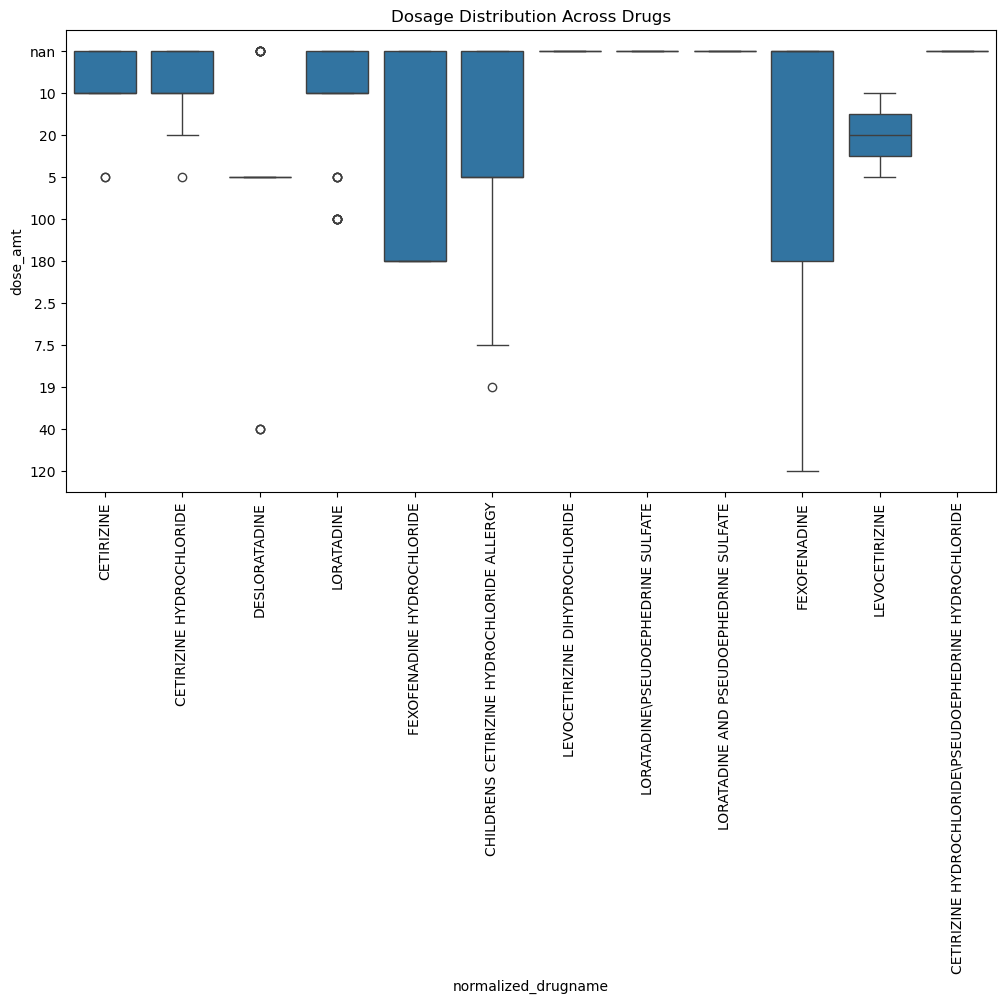

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='normalized_drugname', y='dose_amt', data=normalized_df)
plt.xticks(rotation=90)
plt.title("Dosage Distribution Across Drugs")
plt.show()


In [81]:
print(normalized_df[normalized_df['dose_amt'].isna()]['normalized_drugname'].value_counts().head(10))

Series([], Name: count, dtype: int64)


In [82]:
convert_nan_to_npnan(normalized_df,'dose_amt')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod,normalized_drugname
0,1454484512,14544845,CETIRIZINE,20110101,drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
1,1454484512,14544845,CETIRIZINE,20110101,drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
2,1454484512,14544845,CETIRIZINE,20110101,hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
3,1454484512,14544845,CETIRIZINE,20110101,intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
4,1454484512,14544845,CETIRIZINE,20110101,off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,NaN,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14.0,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan,FEXOFENADINE
531,247906781,24790678,CETIRIZINE,20240705,cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81.0,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan,CETIRIZINE
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,NaN,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan,CETIRIZINE HYDROCHLORIDE
533,247953721,24795372,CETIRIZINE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE H

In [83]:
normalized_df.groupby('normalized_drugname')['dose_amt'].describe().sort_values(by='count', ascending=False).head(10)

,count,unique,top,freq
normalized_drugname,,,,
CETIRIZINE,187,3,10,128
CETIRIZINE HYDROCHLORIDE,133,4,10,67
LORATADINE,63,4,nan,30
FEXOFENADINE,40,3,nan,22
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY,37,6,5,16
DESLORATADINE,37,3,5,26
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE,13,1,nan,13
LEVOCETIRIZINE DIHYDROCHLORIDE,9,1,nan,9
FEXOFENADINE HYDROCHLORIDE,7,2,180,4


In [84]:
normalized_df['dose_amt'].max()

'nan'

In [85]:
def convert_str_to_float(df, column_name):
    df = df.copy()
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce') 
    return df


In [86]:
new_df = convert_str_to_float(normalized_df,'dose_amt')

In [87]:
new_df[new_df['dose_amt']!=10.0][['dose_amt','dose_unit','normalized_drugname']]

,dose_amt,dose_unit,normalized_drugname
0,NaN,nan,CETIRIZINE
1,NaN,nan,CETIRIZINE
2,NaN,nan,CETIRIZINE
3,NaN,nan,CETIRIZINE
4,NaN,nan,CETIRIZINE
...,...,...,...
529,NaN,nan,FEXOFENADINE
530,NaN,nan,FEXOFENADINE
532,NaN,nan,CETIRIZINE HYDROCHLORIDE
533,NaN,nan,CETIRIZINE


In [88]:
new_df['dose_amt'].max()

180.0

In [89]:
convert_nan_to_npnan(new_df,'dose_amt')

,primaryid,caseid,drugname,event_dt,pt,outc_cod,drug_seq,role_cod,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,primaryid_reac,drug_rec_act,primaryid_demo,caseversion,i_f_code,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,mfr_num,mfr_sndr,lit_ref,age,age_cod,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country,primaryid_outc,primaryid_rpsr,rpsr_cod,normalized_drugname
0,1454484512,14544845,CETIRIZINE,20110101,drug abuse,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
1,1454484512,14544845,CETIRIZINE,20110101,drug-induced liver injury,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
2,1454484512,14544845,CETIRIZINE,20110101,hepatic necrosis,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
3,1454484512,14544845,CETIRIZINE,20110101,intentional overdose,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
4,1454484512,14544845,CETIRIZINE,20110101,off label use,"OT,HO,LT",3,PS,CETIRIZINE HYDROCHLORIDE,1,Unknown,UNK,nan,nan,D,nan,nan,nan,090750,NaN,nan,Film-coated tablet,nan,1454484512,nan,1454484512,12,F,20240923,20180217,20241004,EXP,nan,FR-AUROBINDO-AUR-APL-2018-007959,AUROBINDO,"M^Kada H, Perazzo H, Munteanu M, Ngo Y, Ramanu...",31.0,YR,nan,F,Y,nan,nan,20241004,nan,MD,FR,FR,1454484512,nan,nan,CETIRIZINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,247893501,24789350,FEXOFENADINE,20240710,skin lesion,OT,1,PS,FEXOFENADINE HYDROCHLORIDE,1,nan,Increasing doses from 60 mgs OD to 240 mgs OD....,nan,nan,N,nan,Asked But Unknown,nan,076502,NaN,nan,nan,nan,247893501,nan,247893501,1,I,20241224,20241230,20241230,EXP,GB-MHRA-MED-202412232351086500-CPWQY,GB-RDY-SPO/GBR/24/0019182,DR REDDYS,nan,14.0,YR,T,M,Y,nan,nan,20241230,nan,CN,GB,GB,247893501,nan,nan,FEXOFENADINE
531,247906781,24790678,CETIRIZINE,20240705,cardiac failure,HO,2,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,"10 milligram, 1 cyclical",nan,nan,D,nan,nan,nan,076677,10.0,MG,Unknown,nan,247906781,nan,247906781,1,I,20241220,20241230,20241230,EXP,FR-AFSSAPS-TS2024001547,FR-MYLANLABS-2024M1115429,MYLAN,nan,81.0,YR,nan,F,Y,52,KG,20241230,nan,MD,FR,FR,247906781,nan,nan,CETIRIZINE
532,247919361,24791936,CETIRIZINE HYDROCHLORIDE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE HYDROCHLORIDE,1,Oral,nan,nan,nan,N,nan,nan,nan,019835,NaN,nan,Unknown,QD,247919361,nan,247919361,1,I,20241223,20241231,20241231,EXP,FR-AFSSAPS-NY2024001489,FR-KENVUE-20241207009,Kenvue,nan,64.0,nan,nan,nan,Y,nan,nan,20241231,nan,MD,FR,FR,247919361,nan,nan,CETIRIZINE HYDROCHLORIDE
533,247953721,24795372,CETIRIZINE,20241126,lichenoid keratosis,OT,1,PS,CETIRIZINE

In [90]:
new_df[new_df['dose_amt'].notna()][['dose_amt','dose_unit']]

,dose_amt,dose_unit
32,10.0,MG
33,10.0,MG
34,10.0,MG
35,10.0,MG
38,10.0,MG
...,...,...
513,10.0,MG
514,120.0,MG
524,10.0,MG
525,10.0,MG


In [91]:
new_df['dose_unit'].unique()

array(['nan', 'MG', 'GTT', 'ML'], dtype=object)

In [92]:
new_df.groupby('normalized_drugname')['dose_amt'].describe().sort_values(by='count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
normalized_drugname,,,,,,,,
CETIRIZINE,130.0,9.923077,0.617765,5.0,10.00,10.0,10.00,10.0
CETIRIZINE HYDROCHLORIDE,70.0,10.214286,1.792843,5.0,10.00,10.0,10.00,20.0
LORATADINE,33.0,28.484848,37.717802,5.0,10.00,10.0,10.00,100.0
DESLORATADINE,29.0,8.620690,10.847692,5.0,5.00,5.0,5.00,40.0
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY,27.0,5.796296,3.383385,2.5,5.00,5.0,5.00,19.0
FEXOFENADINE,18.0,176.666667,14.142136,120.0,180.00,180.0,180.00,180.0
FEXOFENADINE HYDROCHLORIDE,4.0,180.000000,0.000000,180.0,180.00,180.0,180.00,180.0
LEVOCETIRIZINE,2.0,7.500000,3.535534,5.0,6.25,7.5,8.75,10.0
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
new_df[new_df['dose_amt'].isna()]['normalized_drugname'].value_counts().head()

normalized_drugname
CETIRIZINE HYDROCHLORIDE                                  63
CETIRIZINE                                                57
LORATADINE                                                30
FEXOFENADINE                                              22
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE    13
Name: count, dtype: int64

In [94]:
def convert_dose_units(df):
    """
   standardizing the dosage amount
    """
    df = df.copy()
    df.loc[df['dose_unit'] == 'MG', 'converted_dose_amt'] = df.loc[df['dose_unit'] == 'MG', 'dose_amt']
    # 1 ML = 1 MG
    df.loc[df['dose_unit'] == 'ML', 'converted_dose_amt'] = df.loc[df['dose_unit'] == 'ML', 'dose_amt'] * 1
    
    # 1 GTT ≈ 0.05 MG
    df.loc[df['dose_unit'] == 'GTT', 'converted_dose_amt'] = df.loc[df['dose_unit'] == 'GTT', 'dose_amt'] * 0.05
    
    df['converted_dose_amt'] = pd.to_numeric(df['converted_dose_amt'], errors='coerce')
    
    return df

# new_df['converted_dose_amt'] = new_df['dose_amt'].apply(convert_dose_units)
dose_converted_df = convert_dose_units(new_df)


In [95]:
new_df['dose_unit'].unique()

array(['nan', 'MG', 'GTT', 'ML'], dtype=object)

In [96]:
new_df.groupby('normalized_drugname')['dose_amt'].describe().sort_values(by='count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
normalized_drugname,,,,,,,,
CETIRIZINE,130.0,9.923077,0.617765,5.0,10.00,10.0,10.00,10.0
CETIRIZINE HYDROCHLORIDE,70.0,10.214286,1.792843,5.0,10.00,10.0,10.00,20.0
LORATADINE,33.0,28.484848,37.717802,5.0,10.00,10.0,10.00,100.0
DESLORATADINE,29.0,8.620690,10.847692,5.0,5.00,5.0,5.00,40.0
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY,27.0,5.796296,3.383385,2.5,5.00,5.0,5.00,19.0
FEXOFENADINE,18.0,176.666667,14.142136,120.0,180.00,180.0,180.00,180.0
FEXOFENADINE HYDROCHLORIDE,4.0,180.000000,0.000000,180.0,180.00,180.0,180.00,180.0
LEVOCETIRIZINE,2.0,7.500000,3.535534,5.0,6.25,7.5,8.75,10.0
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
new_df.groupby('normalized_drugname')['dose_amt'].describe().sort_values(by='count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
normalized_drugname,,,,,,,,
CETIRIZINE,130.0,9.923077,0.617765,5.0,10.00,10.0,10.00,10.0
CETIRIZINE HYDROCHLORIDE,70.0,10.214286,1.792843,5.0,10.00,10.0,10.00,20.0
LORATADINE,33.0,28.484848,37.717802,5.0,10.00,10.0,10.00,100.0
DESLORATADINE,29.0,8.620690,10.847692,5.0,5.00,5.0,5.00,40.0
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY,27.0,5.796296,3.383385,2.5,5.00,5.0,5.00,19.0
FEXOFENADINE,18.0,176.666667,14.142136,120.0,180.00,180.0,180.00,180.0
FEXOFENADINE HYDROCHLORIDE,4.0,180.000000,0.000000,180.0,180.00,180.0,180.00,180.0
LEVOCETIRIZINE,2.0,7.500000,3.535534,5.0,6.25,7.5,8.75,10.0
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
new_df.groupby('normalized_drugname')['dose_amt'].describe()


,count,mean,std,min,25%,50%,75%,max
normalized_drugname,,,,,,,,
CETIRIZINE,130.0,9.923077,0.617765,5.0,10.00,10.0,10.00,10.0
CETIRIZINE HYDROCHLORIDE,70.0,10.214286,1.792843,5.0,10.00,10.0,10.00,20.0
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY,27.0,5.796296,3.383385,2.5,5.00,5.0,5.00,19.0
DESLORATADINE,29.0,8.620690,10.847692,5.0,5.00,5.0,5.00,40.0
FEXOFENADINE,18.0,176.666667,14.142136,120.0,180.00,180.0,180.00,180.0
FEXOFENADINE HYDROCHLORIDE,4.0,180.000000,0.000000,180.0,180.00,180.0,180.00,180.0
LEVOCETIRIZINE,2.0,7.500000,3.535534,5.0,6.25,7.5,8.75,10.0
LEVOCETIRIZINE DIHYDROCHLORIDE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
median_dosage = new_df.groupby(['normalized_drugname', 'route'])['dose_amt'].median()
median_dosage


normalized_drugname                                     route                       
CETIRIZINE                                              Oral                             10.0
                                                        Transplacental                    NaN
                                                        Unknown                          10.0
                                                        nan                              10.0
CETIRIZINE HYDROCHLORIDE                                Occlusive dressing technique     10.0
                                                        Oral                             10.0
                                                        Unknown                          10.0
CETIRIZINE HYDROCHLORIDE\PSEUDOEPHEDRINE HYDROCHLORIDE  Oral                              NaN
CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY              Oral                              5.0
DESLORATADINE                                           Oral         

In [100]:
new_df.columns


Index(['primaryid', 'caseid', 'drugname', 'event_dt', 'pt', 'outc_cod',
       'drug_seq', 'role_cod', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'primaryid_reac', 'drug_rec_act', 'primaryid_demo', 'caseversion',
       'i_f_code', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num',
       'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod', 'age_grp', 'sex',
       'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr', 'occp_cod',
       'reporter_country', 'occr_country', 'primaryid_outc', 'primaryid_rpsr',
       'rpsr_cod', 'normalized_drugname'],
      dtype='object')

In [101]:
dose_converted_df[dose_converted_df['dose_unit'] =='GTT'][['dose_amt','converted_dose_amt','dose_unit']]

,dose_amt,converted_dose_amt,dose_unit
141,10.0,0.5,GTT
142,10.0,0.5,GTT


In [102]:
dose_converted_df[dose_converted_df['dose_amt']][['pt','normalized_drugname']]

KeyError: "None of [Index([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n       ...\n       10.0,  nan,  nan,  nan,  nan,  nan, 10.0,  nan,  nan,  nan],\n      dtype='float64', length=535)] are in the [columns]"

In [ ]:
dose_converted_df['wt_cod'].unique()

In [ ]:
def standardize_weight(df):
    df = df.copy()

    if 'wt' not in df.columns:
        raise ValueError("Column 'wt' not found in DataFrame")

    # converting weight to float and handling NaN
    df = convert_str_to_float(df, 'wt')
    df = convert_nan_to_npnan(df, 'wt')

    df['converted_wt'] = df['wt']

    # converting pounds to kg
    if 'LB' in df['wt_cod'].dropna().unique():  
        df.loc[df['wt_cod'] == 'LB', 'converted_wt'] *= 0.453592 

    return df



In [ ]:
weight_converted_df = standardize_weight(dose_converted_df)

In [ ]:
weight_converted_df[['wt', 'wt_cod', 'converted_wt']].dropna().sample(10)


In [ ]:
weight_converted_df[['primaryid','caseid','drugname','normalized_drugname','event_dt','pt','outc_cod']]

In [ ]:
def drop_irrelevant_columns(df):
    """
    dropping unnecessary columns
    """
    df = df.copy()
    
    for col in df.columns:
        df = convert_nan_to_npnan(df, col)

    columns_to_drop = [
        'val_vbm', 'lot_num', 'exp_dt', 'nda_num', 'auth_num', 'mfr_num', 
        'mfr_sndr', 'lit_ref', 'primaryid_reac', 'caseversion', 'to_mfr', 
        'occp_cod', 'reporter_country', 'occr_country', 'wt_cod'
    ]

    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
    return df


In [ ]:
dropped_columns_df = drop_irrelevant_columns(weight_converted_df)

In [ ]:
weight_converted_df[weight_converted_df['dose_unit'].isna()]

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_variables(df):
    """
    encoding the categorical variables.
    """
    df = df.copy()

    categorical_cols = ['i_f_code', 'rechal', 'dechal', 'drug_rec_act', 'route', 'dose_form', 'dose_freq']
    for col in categorical_cols:
        if col in df.columns:
            df = convert_nan_to_npnan(df, col)

    # binary conversion
    if 'i_f_code' in df.columns:
        df['i_f_code'] = df['i_f_code'].map({'Y': 1, 'N': 0})

    # ordinal encoding
    ordinal_cols = ['rechal', 'dechal', 'drug_rec_act']
    for col in ordinal_cols:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    # one-hot encoding for nominal categorical
    df = pd.get_dummies(df, columns=['route', 'dose_form', 'dose_freq'], drop_first=True)

    return df


In [ ]:
encoded_df = encode_categorical_variables(dropped_columns_df)

In [ ]:
def convert_date_columns(df):
    """
    standardizing the date columns
    """
    df = df.copy()
    
    date_cols = ['event_dt', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_dt']
    for col in date_cols:
        if col in df.columns:
            df = convert_nan_to_npnan(df, col)

    # conversion to datetime format
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%Y%m%d', errors='coerce')

    return df


In [ ]:
date_converted_df = convert_date_columns(encoded_df)

In [ ]:
date_converted_df.info()
date_converted_df.head()


In [ ]:
date_converted_df.groupby('normalized_drugname')['dose_amt'].value_counts()

In [ ]:
date_converted_df[date_converted_df['dose_amt'].isna()]['normalized_drugname'].value_counts()

In [ ]:
import re

def further_normalize_drug_names(df, column='normalized_drugname'):
    """
        standardizing the known variants of the drug

    """
    df = df.copy()

    # converting separators to a uniform format
    df[column] = df[column].str.replace(r'[\\]', ' / ', regex=True)
    df[column] = df[column].str.replace(r'\s+', ' ', regex=True).str.strip()  

   # known variations mapping
    drug_mapping = {
        "CETIRIZINE HYDROCHLORIDE": "CETIRIZINE",
        "FEXOFENADINE HYDROCHLORIDE": "FEXOFENADINE",
        "LEVOCETIRIZINE DIHYDROCHLORIDE": "LEVOCETIRIZINE",
        # "CHILDRENS CETIRIZINE HYDROCHLORIDE ALLERGY": "CETIRIZINE",
        "CETIRIZINE HYDROCHLORIDE PSEUDOEPHEDRINE HYDROCHLORIDE": "CETIRIZINE / PSEUDOEPHEDRINE",
        "LORATADINE PSEUDOEPHEDRINE SULFATE": "LORATADINE / PSEUDOEPHEDRINE",
        "LORATADINE AND PSEUDOEPHEDRINE SULFATE": "LORATADINE / PSEUDOEPHEDRINE",
        r"LORATADINE / PSEUDOEPHEDRINE SULFATE": "LORATADINE / PSEUDOEPHEDRINE",
        r"CETIRIZINE HYDROCHLORIDE / PSEUDOEPHEDRINE HYDROCHLORIDE": "CETIRIZINE / PSEUDOEPHEDRINE",
    }

    df[column] = df[column].replace(drug_mapping)

    return df

final_normalized_df = further_normalize_drug_names(date_converted_df)

print(final_normalized_df['normalized_drugname'].unique())
